In [268]:
# from google.colab import drive

In [269]:
# drive.mount('/content/drive')

In [270]:
import pandas as pd
import numpy as np

In [271]:
df=pd.read_csv('/content/drive/MyDrive/data/iris.csv')

In [272]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [273]:
from sklearn.preprocessing import LabelEncoder

In [274]:
encoder=LabelEncoder()

In [275]:
df['species']=encoder.fit_transform(df['species'])

In [276]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [277]:
df=df[df['species']!=0][['sepal_length','petal_width','species']]

In [278]:
print(df.columns)


Index(['sepal_length', 'petal_width', 'species'], dtype='object')


In [279]:
df.shape

(100, 3)

In [280]:
import seaborn as sns
import matplotlib.pyplot as plt

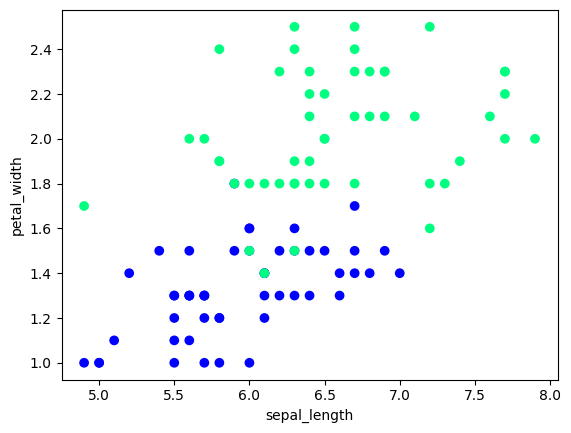

In [281]:
plt.scatter(df['sepal_length'],df['petal_width'],c=df['species'] ,cmap='winter')
plt.xlabel('sepal_length')
plt.ylabel('petal_width')
plt.show()

In [282]:
df = df.sample(frac=1)
df_train =df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(6)
df_test=df.iloc[80:,:].sample(5)

In [283]:
x_test = df_val.iloc[:,0:2]
y_test = df_val.iloc[:,2]

In [284]:
# Data for tree 1
df_bag=df_train.sample(8,replace=True)
x_bag = df_bag.iloc[:,0:2]
y_bag = df_bag.iloc[:,2]

In [285]:
df_bag

,sepal_length,petal_width,species
59,5.2,1.4,1
56,6.3,1.6,1
52,6.9,1.5,1
90,5.5,1.2,1
139,6.9,2.1,2
139,6.9,2.1,2
90,5.5,1.2,1
90,5.5,1.2,1


In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

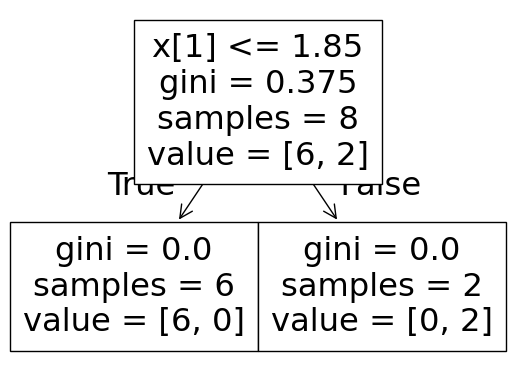

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666


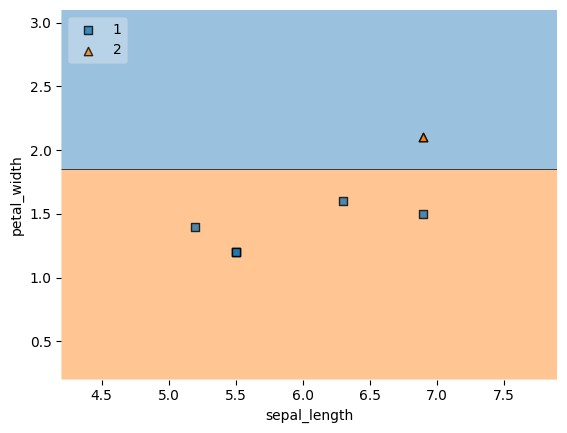

In [287]:
df_bag_1= DecisionTreeClassifier()
evaluate(df_bag_1,x_bag,y_bag)

In [288]:
def evaluate(model,x,y):
  model.fit(x,y)
  plot_tree(model)
  plt.show()
  plot_decision_regions(x.values,y.values,clf=model,legend=2)
  plt.xlabel('sepal_length')
  plt.ylabel('petal_width')

  y_pred=model.predict(x_test)
  print(accuracy_score(y_test,y_pred))

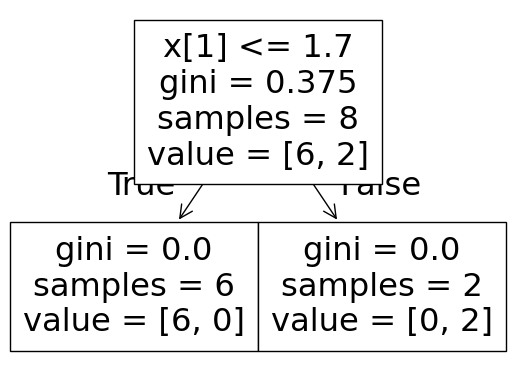

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666


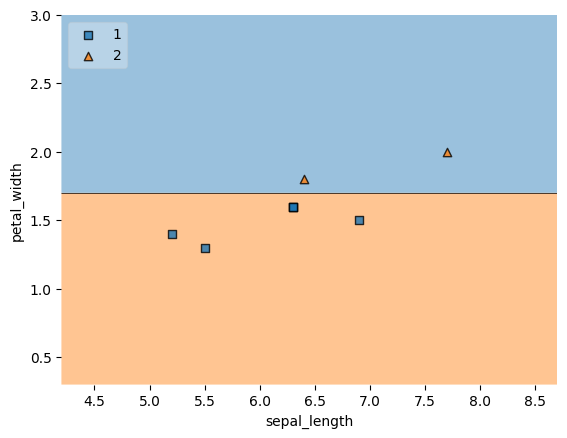

In [289]:
# Data for tree 2
df_bag=df_train.sample(8,replace=True)
x_bag = df_bag.iloc[:,0:2]
y_bag = df_bag.iloc[:,2]
df_bag_2 = DecisionTreeClassifier()
evaluate(df_bag_2,x_bag,y_bag)

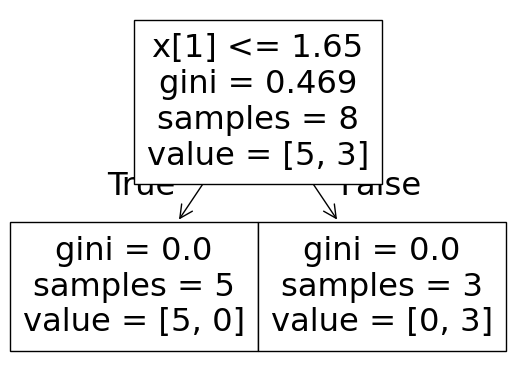

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6666666666666666


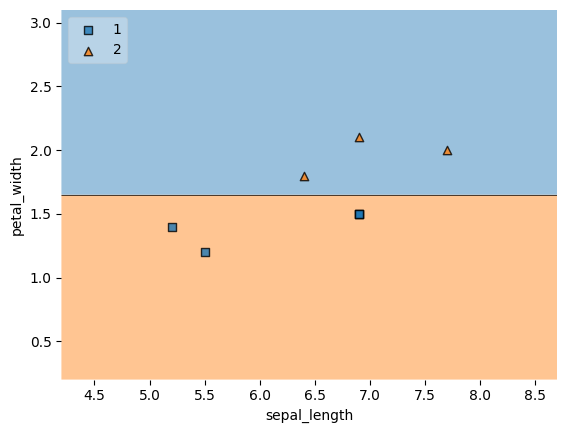

In [290]:
# Data for tree 3
df_bag=df_train.sample(8,replace=True)
x_bag = df_bag.iloc[:,0:2]
y_bag = df_bag.iloc[:,2]
df_bag_3 = DecisionTreeClassifier()
evaluate(df_bag_3,x_bag,y_bag)

In [291]:
df_test

,sepal_length,petal_width,species
110,6.5,2.0,2
109,7.2,2.5,2
120,6.9,2.3,2
146,6.3,1.9,2
97,6.2,1.3,1


In [293]:
print("predictor 1",df_bag_1.predict(df_test.iloc[0:6,0:2]))
print("predictor 2",df_bag_2.predict(df_test.iloc[0:6,0:2]))
print("predictor 3",df_bag_3.predict(df_test.iloc[0:6,0:2]))

predictor 1 [2 2 2 2 1]
predictor 2 [2 2 2 2 1]
predictor 3 [2 2 2 2 1]
